# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [4]:
arquivo_base = 'Mod07_Aula1_Tratado.csv'
df = pd.read_csv(arquivo_base)

df.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True) #excluindo coluna UNNAMED

In [10]:
y = df.mau
X = df.drop('mau', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
#1) Defina um objeto com a função da árvore de decisão vista em aula.

clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [13]:
#2) Treine o modelo com os dados que você separou para treinamento.

clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

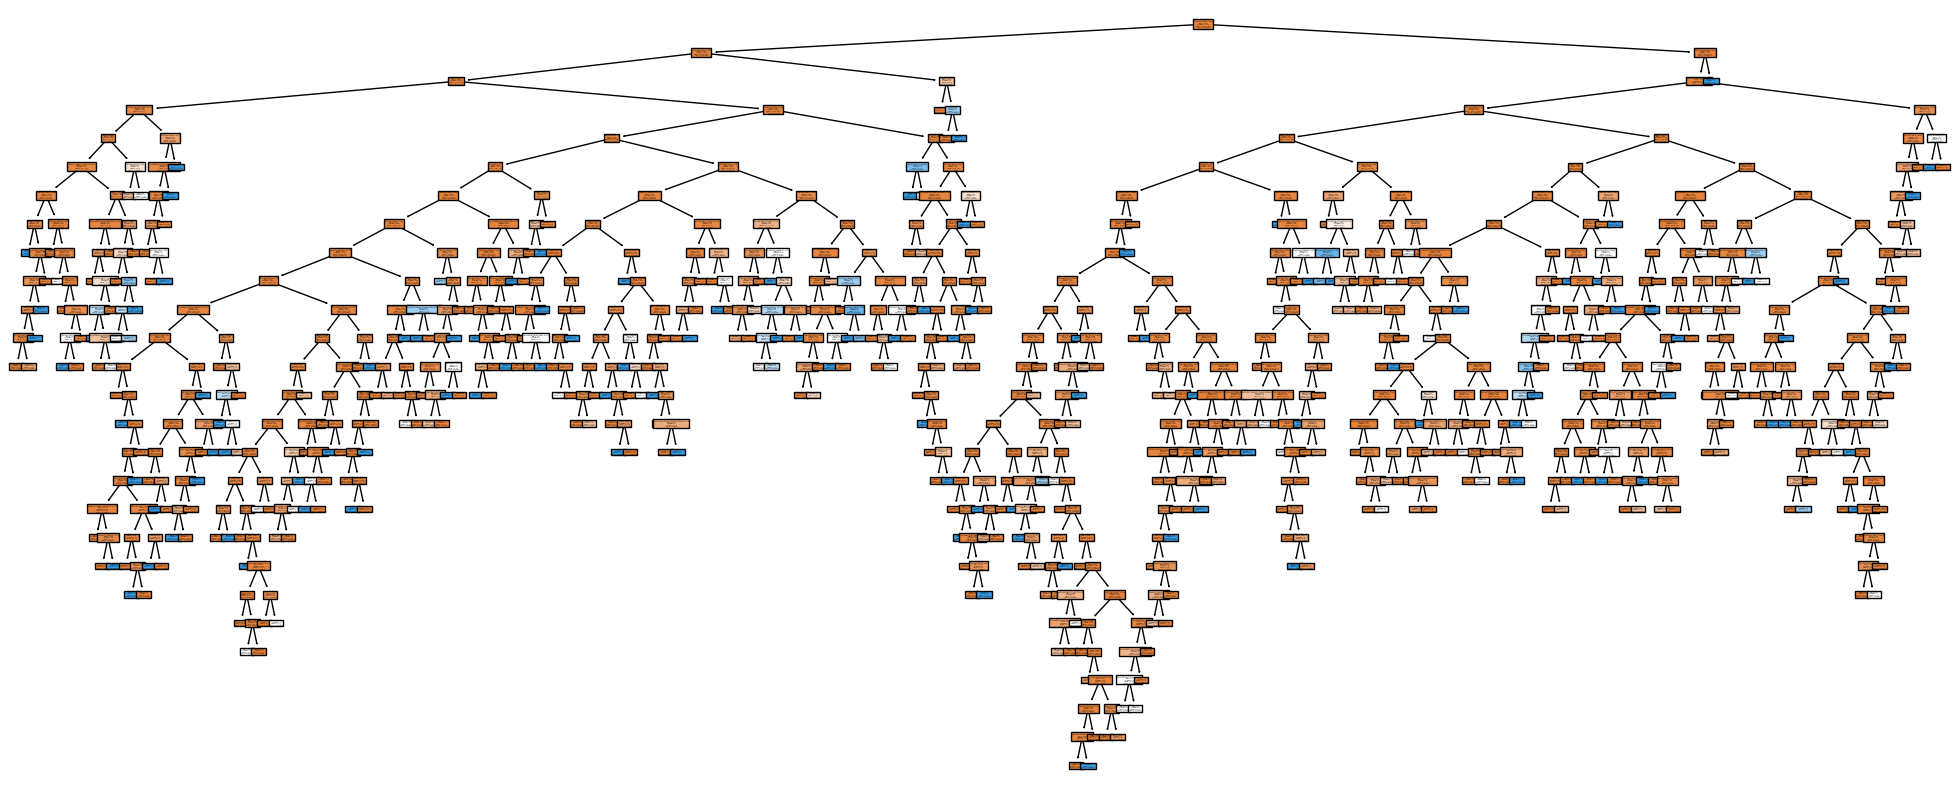

In [19]:
#3) Visualize a árvore. Talvez você queira aumentar um pouco a figura.

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'], #conforme sugestao do exercicio
          feature_names=list(X_train.columns));

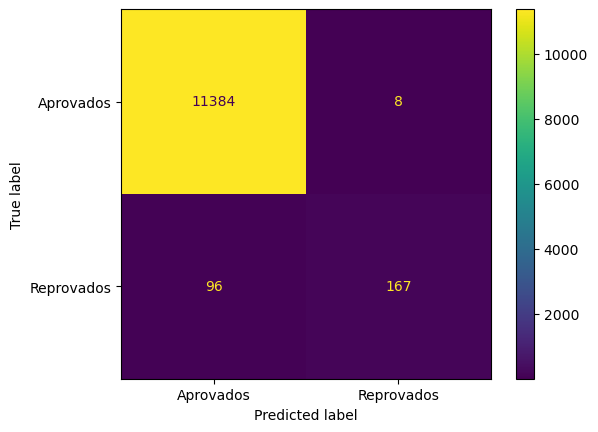

In [20]:
#4) Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [21]:
#5) Calcule a acurácia na base de treinamento.

predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

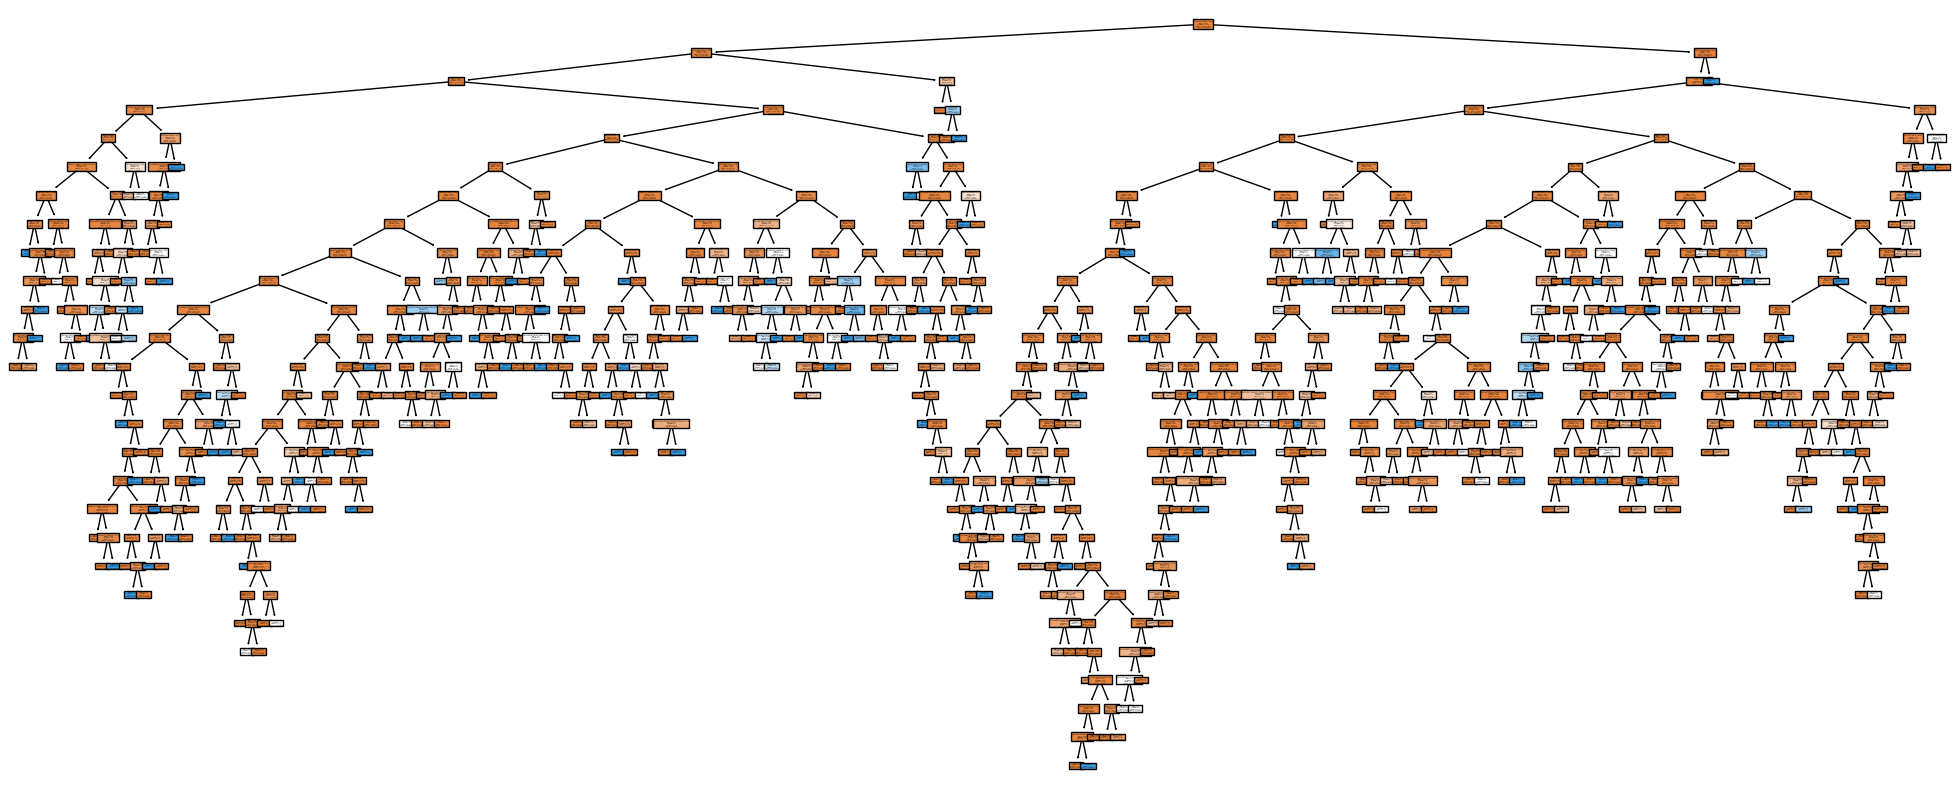

In [23]:
#1) Classifique a base de teste de acordo com a árvore que você treinou no item 2.

plt.figure(figsize=(25, 10))
plot_tree(clf, 
          filled=True,
          class_names= ['Aprovados', 'Reprovados'],
          feature_names=X_test.columns);

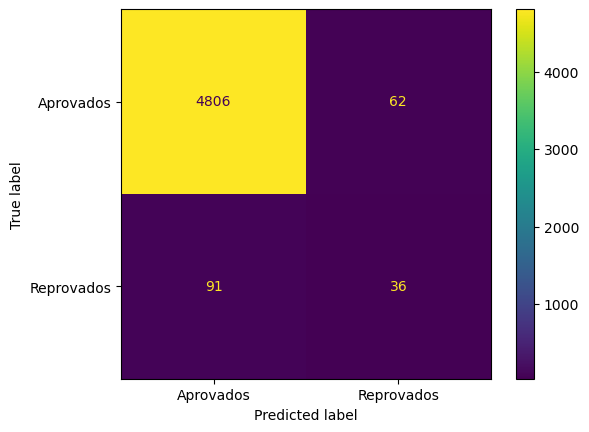

In [24]:
#2. Produza a visualização da matriz de confusão para a base de teste.

cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [25]:
#3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9693693693693693

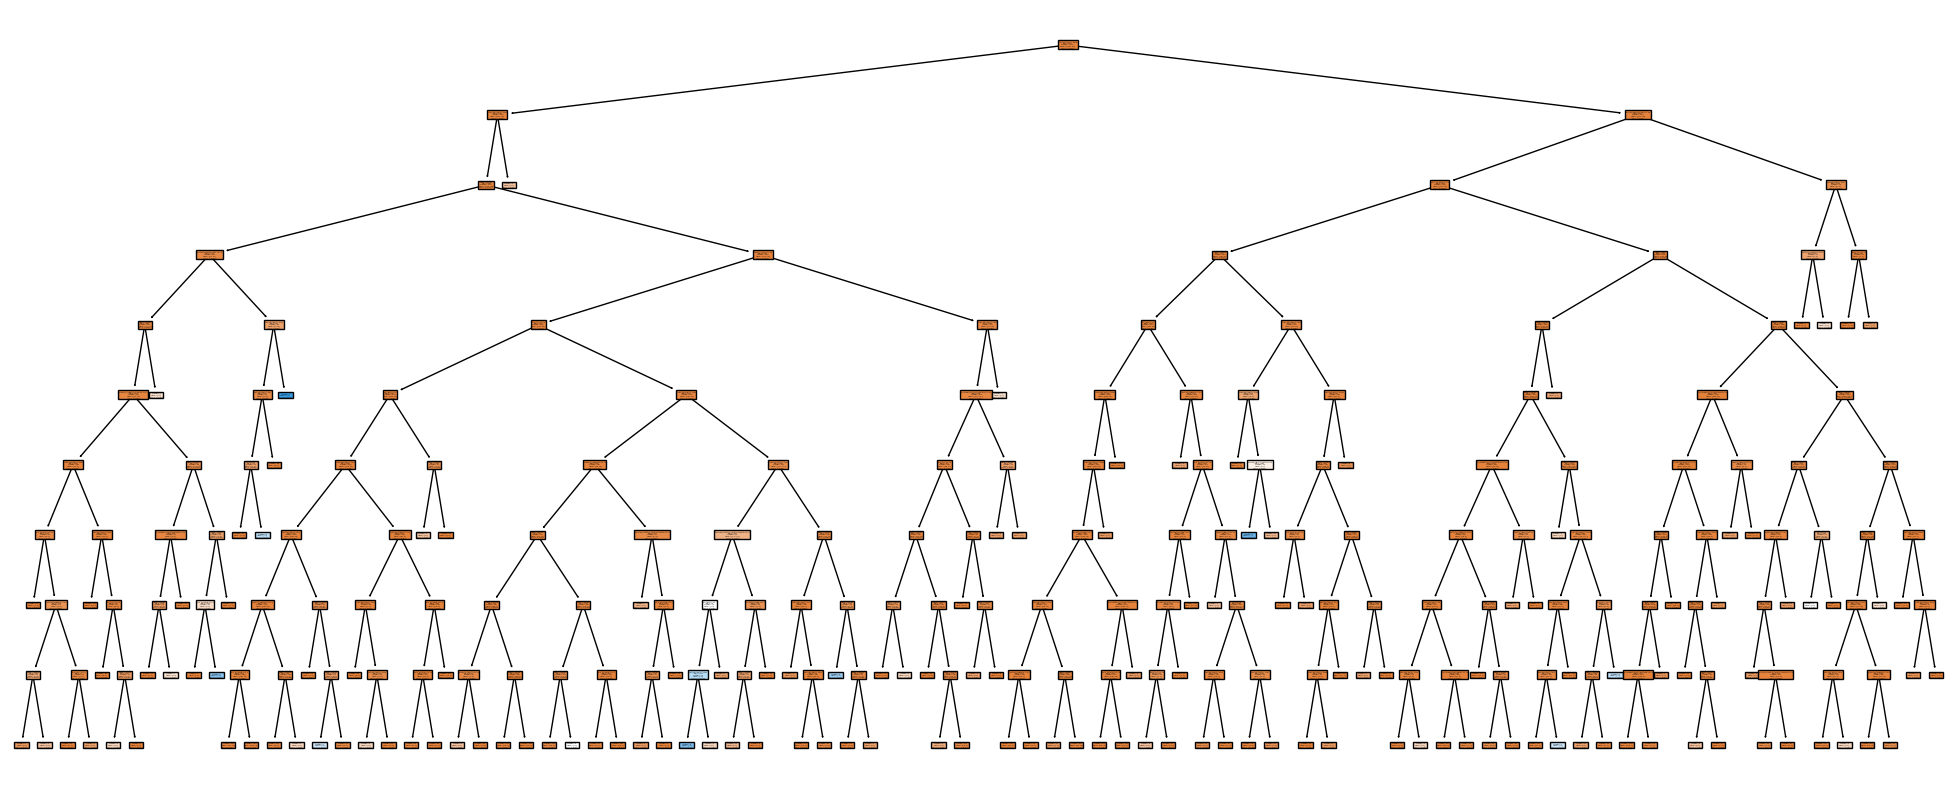

In [27]:
#4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

clf_pod = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_pod = clf_pod.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_pod,
          filled=True,
          class_names=['Aprovados', 'Reprovados'], 
          feature_names=list(X_train.columns));

#usado 'train' ao inves de test 


In [33]:
#4.1) Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

y_proporcao = clf_pod.predict(X_train)

#Aprovados = y_proporcao['0'].count() - erro array
#Aprovados

# Contagem de valores proporcao 
contagem = np.bincount(y_proporcao)
reprovados = contagem[1] if len(contagem) > 1 else 0  # Número de aprovações (1)
aprovados = contagem[0] if len(contagem) > 0 else 0  # Número de não aprovações (0)

print(f"Aprovados: {aprovados}")
print(f"Reprovados: {reprovados}")



Aprovados: 11598
Reprovados: 57


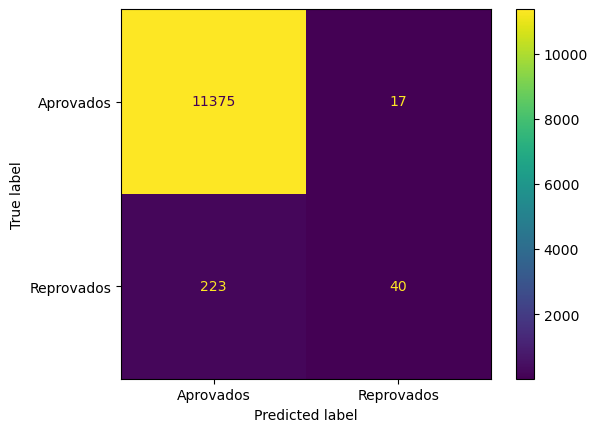

In [34]:
cm = confusion_matrix(y_train, clf_pod.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [37]:
#5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

#y_train2 = y_train.loc[y_train == 1] = 0

# Modificar y_train para que todos os valores sejam 0
y_train2 = np.zeros_like(y_train)

predict = clf_pod.predict(X_train)
accuracy_score(y_train2, predict)

0.9951093951093951